In [1]:
import pinocchio as pin
import numpy as np

In [2]:
model = pin.buildModelFromUrdf("urdf/h1.urdf", pin.JointModelFreeFlyer())
data = model.createData()

In [3]:
model.names[0]  # 'world'

'universe'

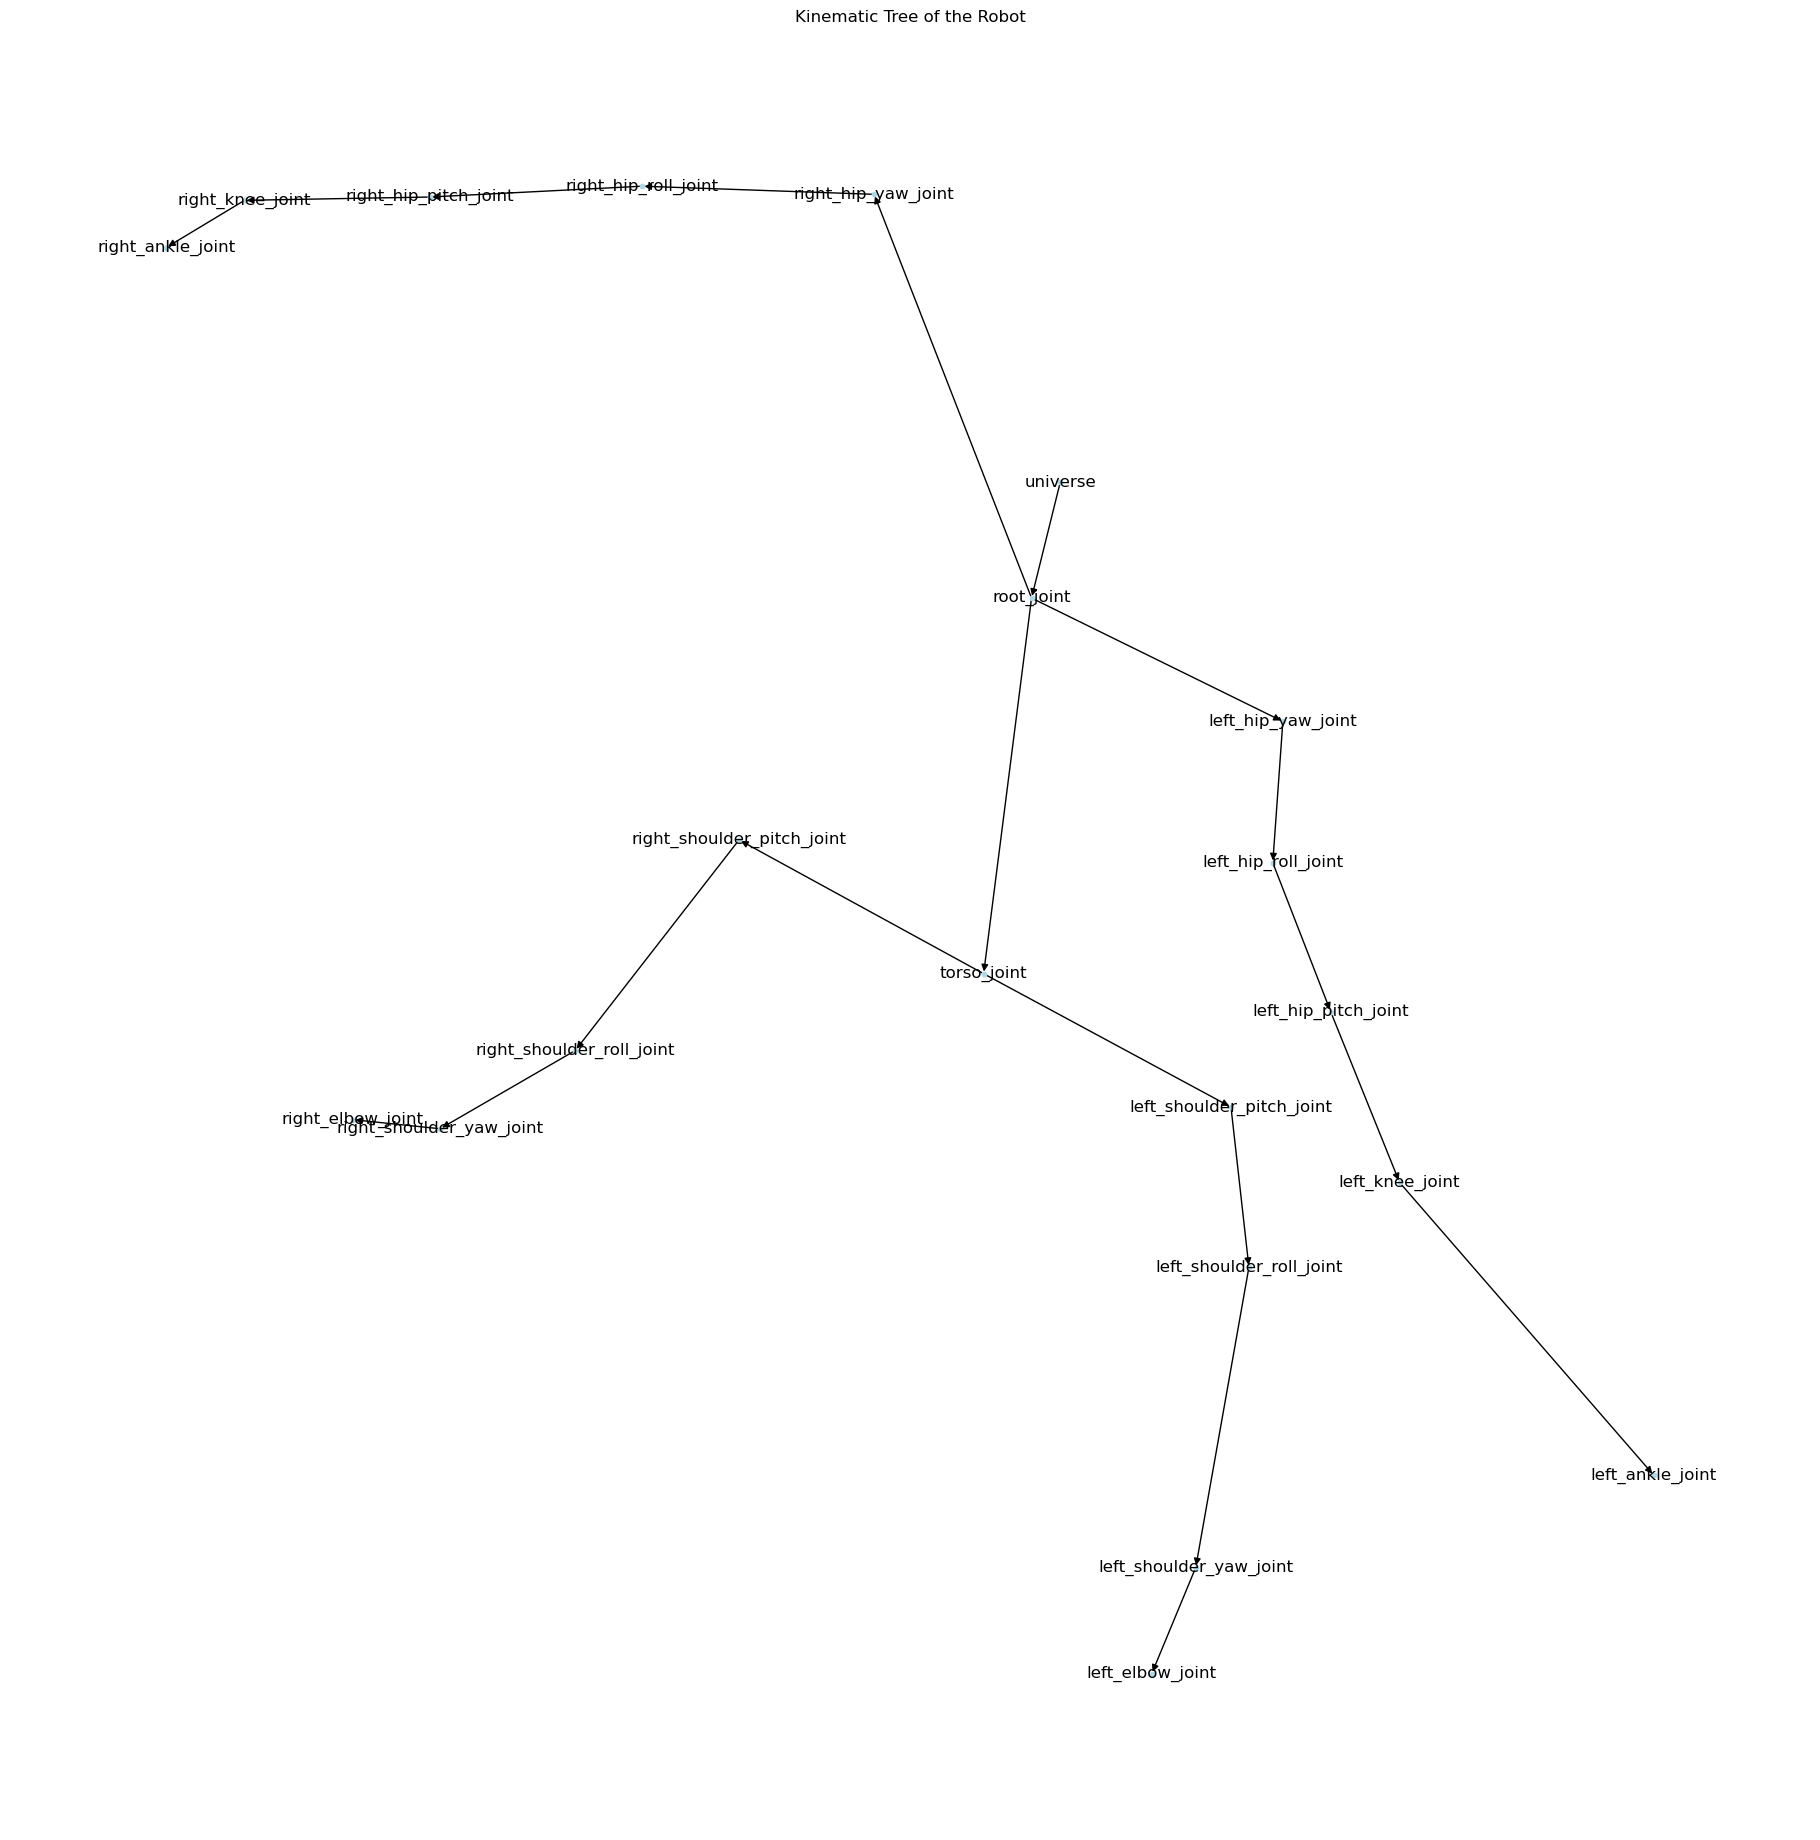

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for joint_id, joint in enumerate(model.joints[1:]):  # Skip universe
    parent = model.parents[joint.id]
    parent_name = model.names[parent]
    G.add_edge(parent_name, model.names[joint_id+1])

plt.figure(figsize=(18, 18))
nx.draw(G, with_labels=True, node_size=10, node_color='lightblue')
plt.title("Kinematic Tree of the Robot")
plt.show()

In [9]:
q = np.random.rand(model.nq)
print(q.shape)
vq = np.random.rand(model.nv)
print(vq.shape)

(26,)
(25,)


In [121]:
# M(q)
M = pin.crba(model, data, q)
print(M.shape)
h = pin.rnea(model, data, q, vq, np.zeros(25))
print(h.shape)

(25, 25)
(25,)


In [124]:
pin.centerOfMass(model, data, q, vq)

print(data.com[0]) # 
print(data.vcom[0])

[0.31585546 0.53211916 0.85525601]
[0.05255417 0.63648919 0.82652454]


In [125]:
for name in model.names:
    print(f"\n\n{name}, {model.getJointId(name)}")
    print(data.com[model.getJointId(name)])




universe, 0
[0.31585546 0.53211916 0.85525601]


root_joint, 1
[-0.04080363  0.02169614 -0.00506956]


left_hip_yaw_joint, 2
[-0.09785034  0.09727106 -0.05978639]


left_hip_roll_joint, 3
[-0.15003591  0.07213567 -0.12579867]


left_hip_pitch_joint, 4
[-0.00321534 -0.01673514 -0.26305029]


left_knee_joint, 5
[ 0.00465249 -0.00401458 -0.20692797]


left_ankle_joint, 6
[ 4.2575e-02 -1.0000e-06 -4.4672e-02]


right_hip_yaw_joint, 7
[-0.07081383 -0.04628782 -0.12486465]


right_hip_roll_joint, 8
[-0.11592749 -0.07213567 -0.15367016]


right_hip_pitch_joint, 9
[-0.02062635  0.01673514 -0.25811458]


right_knee_joint, 10
[ 0.00766715  0.00401458 -0.20495673]


right_ankle_joint, 11
[ 4.2575e-02  1.0000e-06 -4.4672e-02]


torso_joint, 12
[0.00064544 0.041817   0.23124199]


left_shoulder_pitch_joint, 13
[ 0.02384317  0.0991465  -0.21195726]


left_shoulder_roll_joint, 14
[ 0.03665711  0.03166218 -0.27662268]


left_shoulder_yaw_joint, 15
[ 0.0685161   0.0012926  -0.22006678]


left_elbow_j

In [144]:
for joint in model.names:
    print(f"{joint}, {model.joints[model.getJointId(joint)].idx_q}")

universe, -1
root_joint, 0
left_hip_yaw_joint, 7
left_hip_roll_joint, 8
left_hip_pitch_joint, 9
left_knee_joint, 10
left_ankle_joint, 11
right_hip_yaw_joint, 12
right_hip_roll_joint, 13
right_hip_pitch_joint, 14
right_knee_joint, 15
right_ankle_joint, 16
torso_joint, 17
left_shoulder_pitch_joint, 18
left_shoulder_roll_joint, 19
left_shoulder_yaw_joint, 20
left_elbow_joint, 21
right_shoulder_pitch_joint, 22
right_shoulder_roll_joint, 23
right_shoulder_yaw_joint, 24
right_elbow_joint, 25


In [145]:
mujoco_model = pin.buildModelFromMJCF("mjcf/h1.xml", pin.JointModelFreeFlyer())
for joint in mujoco_model.names:
    print(f"{joint}, {mujoco_model.joints[mujoco_model.getJointId(joint)].idx_q}")

# mujoco_model.names[2]
# mujoco_model.joints[2].idx_qmujoco

universe, -1
pelvis_free, 0
left_hip_yaw_joint, 7
left_hip_roll_joint, 8
left_hip_pitch_joint, 9
left_knee_joint, 10
left_ankle_joint, 11
right_hip_yaw_joint, 12
right_hip_roll_joint, 13
right_hip_pitch_joint, 14
right_knee_joint, 15
right_ankle_joint, 16
torso_joint, 17
left_shoulder_pitch_joint, 18
left_shoulder_roll_joint, 19
left_shoulder_yaw_joint, 20
left_elbow_joint, 21
right_shoulder_pitch_joint, 22
right_shoulder_roll_joint, 23
right_shoulder_yaw_joint, 24
right_elbow_joint, 25


In [ ]:
for name in model.:
    print(name.name)

universe
root_joint
pelvis
left_hip_yaw_joint
left_hip_yaw_link
left_hip_roll_joint
left_hip_roll_link
left_hip_pitch_joint
left_hip_pitch_link
left_knee_joint
left_knee_link
left_ankle_joint
left_ankle_link
right_hip_yaw_joint
right_hip_yaw_link
right_hip_roll_joint
right_hip_roll_link
right_hip_pitch_joint
right_hip_pitch_link
right_knee_joint
right_knee_link
right_ankle_joint
right_ankle_link
torso_joint
torso_link
d435_left_imager_joint
d435_left_imager_link
d435_rgb_module_joint
d435_rgb_module_link
imu_joint
imu_link
left_shoulder_pitch_joint
left_shoulder_pitch_link
left_shoulder_roll_joint
left_shoulder_roll_link
left_shoulder_yaw_joint
left_shoulder_yaw_link
left_elbow_joint
left_elbow_link
left_wrist_joint
left_wrist_link
logo_joint
logo_link
mid360_joint
mid360_link
right_shoulder_pitch_joint
right_shoulder_pitch_link
right_shoulder_roll_joint
right_shoulder_roll_link
right_shoulder_yaw_joint
right_shoulder_yaw_link
right_elbow_joint
right_elbow_link


In [18]:
from pinocchio.visualize import MeshcatVisualizer
""

''

In [ ]:
geom_model = pin.buildGeomFromUrdf(model=model, urdf_filename="urdf/h1.urdf", package_dirs="meshes", geometry_model=pin.GeometryType.VISUAL, mesh_loader=NONE)


NameError: name 'NONE' is not defined

In [28]:
viz = MeshcatVisualizer(model)

ImportError: Error while importing the viewer client.
Check whether meshcat is properly installed (pip install --user meshcat).